<a href="https://colab.research.google.com/github/jiyun-kong/outta_AI_bootcamp/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최소제곱법 구현하기

In [ ]:
import numpy as np

def ordinaray_least_squares(x, y):
  '''
  데이터 x, y에 대해 mx + b와 실제 y의 잔차제곱합을 최소화하는 직선의 기울기 m과 y절편을 구하는 함수

  x : 독립변수
  y : 종속변수
  반환값 : m, d
  '''
  n = x.size
  m = (np.matmul(x, y) - x.sum() * y.sum() / n) / np.matmul(x, x) - (1/n) * x.sum() ** 2
  b = y.mean() - m*x.mean()
  
  return m, b

  

# 1) 데이터셋 다운로드

In [ ]:
!pip install wget
import wget
wget.download("https://storage.googleapis.com/outta/nba_draft_measurements.nc")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a86e69d464cd339f458aea726b5736986ee8cb3429231656b1ee0e00736b61b5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


'nba_draft_measurements.nc'

# 2) 데이터셋 살펴보기

In [ ]:
from pathlib import Path
import xarray as xr
draft_data = xr.load_dataset(Path.cwd() / "nba_draft_measurements.nc")

draft_data

<xarray.Dataset>
Dimensions:            (names: 70)
Coordinates:
  * names              (names) object 'Nickeil Alexander-Walker' ... 'Dylan W...
Data variables:
    position           (names) object 'SG' 'C' 'PF' 'C' ... 'PG' 'SF' 'PF' 'SF'
    height_no_shoes    (names) float64 76.25 80.75 79.75 ... 78.25 77.75 78.25
    height_with_shoes  (names) float64 77.5 82.0 81.0 86.5 ... 79.75 79.5 79.5
    weight             (names) float64 203.8 239.0 208.4 ... 208.8 240.2 195.8
    wingspan           (names) float64 81.5 87.5 84.0 91.0 ... 82.75 81.75 82.0
    standing_reach     (names) float64 102.0 109.5 107.0 ... 103.0 104.5 104.5
    body_fat_prcnt     (names) float64 5.9 8.5 3.6 7.1 5.0 ... 4.3 4.9 5.4 4.6
    hand_length        (names) float64 8.5 9.25 9.0 9.25 ... 7.75 8.5 9.0 8.25
    hand_width         (names) float64 8.75 9.5 9.75 9.5 ... 9.0 9.5 10.5 9.5
Attributes:
    length-units:  inches
    weight-units:  pounds
    readme:        \nDescribes various measurements of athletes who participa...
    url:           https://www.nbadraft.net/2019-nba-draft-combine-measurements/

# 3) 데이터의 각 특성에 개별적으로 접근하기

In [ ]:
type(draft_data.height_no_shoes)

xarray.core.dataarray.DataArray

In [ ]:
draft_data.height_no_shoes.data

array([76.25, 80.75, 79.75, 84.75, 73.5 , 78.25, 73.  , 77.75, 79.  ,
       85.25, 79.25, 82.  , 79.25, 77.25, 75.  , 74.75, 72.  , 70.75,
       89.25, 80.75, 81.25, 76.  , 72.75, 73.5 , 69.75, 82.25, 81.  ,
       76.5 , 79.25, 74.5 , 76.  , 76.25, 76.75, 79.  , 80.75, 78.75,
       76.5 , 79.  , 74.5 , 76.5 , 76.75, 76.75, 77.  , 80.25, 76.5 ,
       75.25, 77.75, 79.25, 76.25, 78.  , 80.  , 71.5 , 75.5 , 81.75,
       76.  , 82.75, 78.5 , 80.75, 79.25, 81.5 , 76.  , 76.5 , 80.5 ,
       78.5 , 69.5 , 75.  , 75.5 , 78.25, 77.75, 78.25])

In [ ]:
type(draft_data.height_no_shoes.data)

numpy.ndarray

In [ ]:
import numpy as np
height_with_shoes = draft_data.height_with_shoes.data
mean = np.mean(height_with_shoes)
std = np.std(height_with_shoes)

print(mean, std)

79.04642857142858 3.5356078627562297


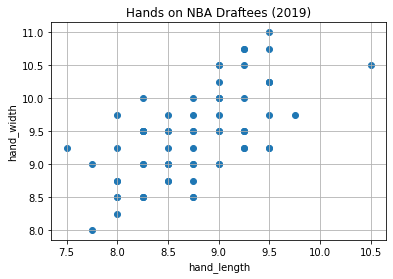

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(x=draft_data.hand_length, y=draft_data.hand_width)
plt.xlabel('hand_length')
plt.ylabel('hand_width')
ax.set_title('Hands on NBA Draftees (2019)')
ax.grid()

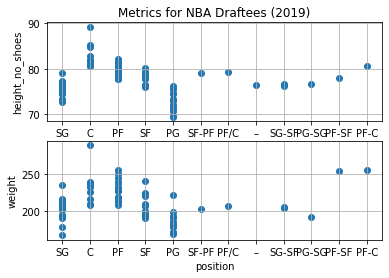

In [ ]:
fig, axes = plt.subplots(nrows=2)
draft_data.plot.scatter(x='position', y='height_no_shoes', ax = axes[0])
draft_data.plot.scatter(x='position', y='weight', ax = axes[1])
axes[0].set_title("Metrics for NBA Draftees (2019)")
axes[0].grid()
axes[1].grid()
plt.show()

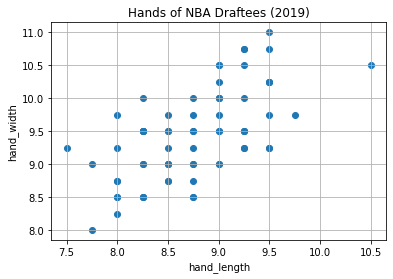

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
draft_data.plot.scatter(x='hand_length', y='hand_width')
ax.set_title('Hands of NBA Draftees (2019)')
plt.grid()
plt.show()

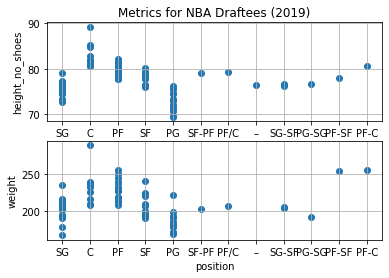

In [ ]:
fig, axes = plt.subplots(nrows=2)
draft_data.plot.scatter(x='position', y='height_no_shoes', ax=axes[0])
draft_data.plot.scatter(x='position', y='weight', ax=axes[1])
axes[0].set_title("Metrics for NBA Draftees (2019)")
[ax.grid() for ax in axes];

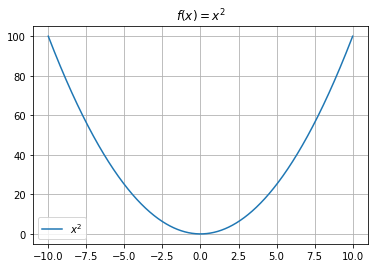

In [ ]:
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 1000)
ax.plot(x, x**2, label="$x^2$") # 연속적인 곡선의 형태
ax.legend();
ax.set_title("$f(x)=x^2$")
ax.grid()

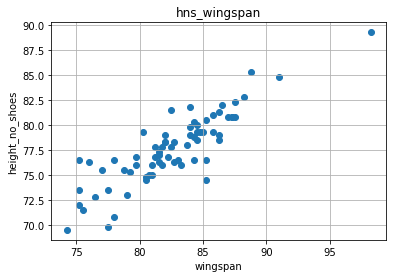

In [ ]:
fig, ax = plt.subplots()
draft_data.plot.scatter(x='wingspan', y='height_no_shoes')
ax.set_title("hns_wingspan")
ax.grid()

In [ ]:
import numpy as np

def ordinary_least_squares(x, y):
  N = x.size
  m = (np.matmul(x, y) - np.sum(y) * np.sum(x) / N) / (np.matmul(x, x) - np.sum(x) * np.sum(x) / N)
  b = np.mean(y) - m * np.mean(x)

  return m, b

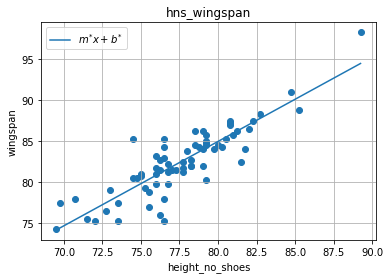

In [ ]:
fig, ax = plt.subplots()
draft_data.plot.scatter(x='height_no_shoes', y='wingspan')
ax.set_title('hns_wingspan')
ax.grid()

height = draft_data.height_no_shoes.data
wingspan = draft_data.wingspan.data

m, b = ordinary_least_squares(height, wingspan)
x = np.linspace(min(height), max(height), 1000)
ax.plot(x, m*x + b, label="$m^{*}x+b^{*}$")
ax.legend()
plt.show()